## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2,16,32,128,256]
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=bs, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-bs-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128

50000/50000 [==============================] - 493s 10ms/step - loss: 2.2140 - acc: 0.1795 - val_loss: 4.1380 - val_acc: 0.2147
Epoch 49/50
50000/50000 [==============================] - 489s 10ms/step - loss: 2.2127 - acc: 0.1784 - val_loss: 3.6777 - val_acc: 0.2331
Epoch 50/50
50000/50000 [==============================] - 488s 10ms/step - loss: 2.2090 - acc: 0.1806 - val_loss: 3.3513 - val_acc: 0.2510
Experiment with Regulizer = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)     

50000/50000 [==============================] - 64s 1ms/step - loss: 1.1670 - acc: 0.5856 - val_loss: 1.3763 - val_acc: 0.5205
Epoch 47/50
50000/50000 [==============================] - 64s 1ms/step - loss: 1.1674 - acc: 0.5861 - val_loss: 1.3381 - val_acc: 0.5281
Epoch 48/50
50000/50000 [==============================] - 63s 1ms/step - loss: 1.1620 - acc: 0.5846 - val_loss: 1.3233 - val_acc: 0.5343
Epoch 49/50
50000/50000 [==============================] - 63s 1ms/step - loss: 1.1533 - acc: 0.5901 - val_loss: 1.3933 - val_acc: 0.5150
Epoch 50/50
50000/50000 [==============================] - 63s 1ms/step - loss: 1.1567 - acc: 0.5898 - val_loss: 1.3943 - val_acc: 0.5122
Experiment with Regulizer = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense

50000/50000 [==============================] - 33s 652us/step - loss: 0.9058 - acc: 0.6757 - val_loss: 1.4193 - val_acc: 0.5286
Epoch 45/50
50000/50000 [==============================] - 33s 656us/step - loss: 0.8995 - acc: 0.6767 - val_loss: 1.5043 - val_acc: 0.5056
Epoch 46/50
50000/50000 [==============================] - 33s 652us/step - loss: 0.8932 - acc: 0.6800 - val_loss: 1.4984 - val_acc: 0.5019
Epoch 47/50
50000/50000 [==============================] - 201s 4ms/step - loss: 0.8921 - acc: 0.6801 - val_loss: 1.5273 - val_acc: 0.5003
Epoch 48/50
50000/50000 [==============================] - 36s 721us/step - loss: 0.8885 - acc: 0.6808 - val_loss: 1.4537 - val_acc: 0.5237
Epoch 49/50
50000/50000 [==============================] - 36s 721us/step - loss: 0.8817 - acc: 0.6846 - val_loss: 1.4862 - val_acc: 0.5147
Epoch 50/50
50000/50000 [==============================] - 36s 721us/step - loss: 0.8783 - acc: 0.6849 - val_loss: 1.5155 - val_acc: 0.5130
Experiment with Regulizer = 128.0

50000/50000 [==============================] - 12s 237us/step - loss: 0.4499 - acc: 0.8393 - val_loss: 2.2301 - val_acc: 0.4753
Epoch 43/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.4400 - acc: 0.8421 - val_loss: 2.2765 - val_acc: 0.4800
Epoch 44/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.4358 - acc: 0.8423 - val_loss: 2.2414 - val_acc: 0.4897
Epoch 45/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.4247 - acc: 0.8481 - val_loss: 2.2985 - val_acc: 0.4734
Epoch 46/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.4153 - acc: 0.8511 - val_loss: 2.1915 - val_acc: 0.4997
Epoch 47/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.4017 - acc: 0.8571 - val_loss: 2.2902 - val_acc: 0.4907
Epoch 48/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.3974 - acc: 0.8558 - val_loss: 2.4488 - val_acc: 0.4740
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 8s 165us/step - loss: 0.3437 - acc: 0.8800 - val_loss: 2.4674 - val_acc: 0.4824
Epoch 41/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3433 - acc: 0.8782 - val_loss: 2.5667 - val_acc: 0.4834
Epoch 42/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.3186 - acc: 0.8870 - val_loss: 2.4633 - val_acc: 0.4862
Epoch 43/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.3192 - acc: 0.8860 - val_loss: 2.6674 - val_acc: 0.4773
Epoch 44/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3092 - acc: 0.8903 - val_loss: 2.6074 - val_acc: 0.4850
Epoch 45/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.2885 - acc: 0.8986 - val_loss: 2.5767 - val_acc: 0.4777
Epoch 46/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.2777 - acc: 0.9020 - val_loss: 2.6250 - val_acc: 0.4860
Epoch 47/50
50000/50000 [==============

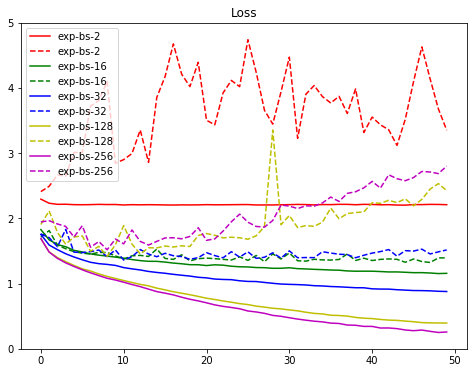

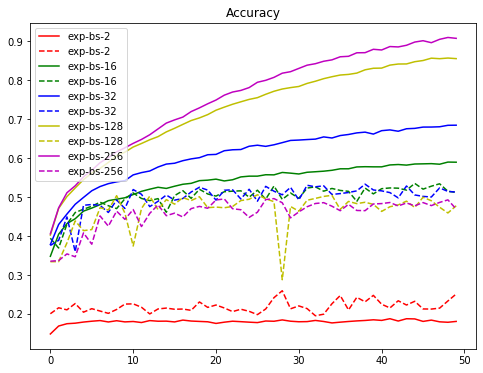

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()